<a href="https://colab.research.google.com/github/yenaungkhant16/.NETAssignment/blob/main/Analyzing%20Trends%20and%20Factors%20Affecting%20Student%20Performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

STUDENT ID - **20071266**

STUDENT NAME - **Ye Naung Khant**

Module - **Programming for Data Analysis CA40%**


# Data Importing


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

data = pd.read_csv('/content/drive/MyDrive/Dataset/enhanced_student_habits_performance_dataset.csv')

In [ ]:
data.head(5)

,student_id,age,gender,major,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,...,screen_time,study_environment,access_to_tutoring,family_income_range,parental_support_level,motivation_level,exam_anxiety_score,learning_style,time_management_score,exam_score
0,100000,26,Male,Computer Science,7.645367,3.0,0.1,Yes,70.3,6.2,...,10.9,Co-Learning Group,Yes,High,9,7,8,Reading,3.0,100
1,100001,28,Male,Arts,5.700000,0.5,0.4,No,88.4,7.2,...,8.3,Co-Learning Group,Yes,Low,7,2,10,Reading,6.0,99
2,100002,17,Male,Arts,2.400000,4.2,0.7,No,82.1,9.2,...,8.0,Library,Yes,High,3,9,6,Kinesthetic,7.6,98
3,100003,27,Other,Psychology,3.400000,4.6,2.3,Yes,79.3,4.2,...,11.7,Co-Learning Group,Yes,Low,5,3,10,Reading,3.2,100
4,100004,25,Female,Business,4.700000,0.8,2.7,Yes,62.9,6.5,...,9.4,Quiet Room,Yes,Medium,9,1,10,Reading,7.1,98


# Data Cleaning

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     80000 non-null  int64  
 1   age                            80000 non-null  int64  
 2   gender                         80000 non-null  object 
 3   major                          80000 non-null  object 
 4   study_hours_per_day            80000 non-null  float64
 5   social_media_hours             80000 non-null  float64
 6   netflix_hours                  80000 non-null  float64
 7   part_time_job                  80000 non-null  object 
 8   attendance_percentage          80000 non-null  float64
 9   sleep_hours                    80000 non-null  float64
 10  diet_quality                   80000 non-null  object 
 11  exercise_frequency             80000 non-null  int64  
 12  parental_education_level       80000 non-null 

In [ ]:
data.drop(columns=['student_id'], inplace=True)

I drop the Student ID during data cleaning because it is a unique identifier that doesn't carry meaningful information for analysis and can distort results if treated as a numeric feature. Additionally, removing it helps protect privacy and prevent data leakage.

In [ ]:
data.head(3)

,age,gender,major,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,...,screen_time,study_environment,access_to_tutoring,family_income_range,parental_support_level,motivation_level,exam_anxiety_score,learning_style,time_management_score,exam_score
0,26,Male,Computer Science,7.645367,3.0,0.1,Yes,70.3,6.2,Poor,...,10.9,Co-Learning Group,Yes,High,9,7,8,Reading,3.0,100
1,28,Male,Arts,5.700000,0.5,0.4,No,88.4,7.2,Good,...,8.3,Co-Learning Group,Yes,Low,7,2,10,Reading,6.0,99
2,17,Male,Arts,2.400000,4.2,0.7,No,82.1,9.2,Good,...,8.0,Library,Yes,High,3,9,6,Kinesthetic,7.6,98


In [ ]:
data.shape

(80000, 30)

I check for missing values in each column of the dataset.

In [ ]:
print(data.isnull().sum())

age                              0
gender                           0
major                            0
study_hours_per_day              0
social_media_hours               0
netflix_hours                    0
part_time_job                    0
attendance_percentage            0
sleep_hours                      0
diet_quality                     0
exercise_frequency               0
parental_education_level         0
internet_quality                 0
mental_health_rating             0
extracurricular_participation    0
previous_gpa                     0
semester                         0
stress_level                     0
dropout_risk                     0
social_activity                  0
screen_time                      0
study_environment                0
access_to_tutoring               0
family_income_range              0
parental_support_level           0
motivation_level                 0
exam_anxiety_score               0
learning_style                   0
time_management_scor

All columns have 0 null values, so I don't need to perform any imputation or removal of rows due to missing data.

As a next step, I check for the number of duplicate rows in the dataset.

In [ ]:
# Check for the number of duplicate rows
duplicate_rows = data.duplicated().sum()
print(f"Found {duplicate_rows} duplicate rows in the dataset.")

Found 0 duplicate rows in the dataset.


The result shows that there are no duplicate rows in this dataset, indicating that all records are unique and the data is clean.

In [ ]:
# Select all columns with data type object
categorical_cols = data.select_dtypes(include=['object']).columns

print("Unique values in each categorical column:\n")
for col in categorical_cols:
    unique_values = data[col].unique()
    print(f"- {col}: {unique_values}")

Unique values in each categorical column:

- gender: ['Male' 'Other' 'Female']
- major: ['Computer Science' 'Arts' 'Psychology' 'Business' 'Engineering' 'Biology']
- part_time_job: ['Yes' 'No']
- diet_quality: ['Poor' 'Good' 'Fair']
- parental_education_level: ['Some College' 'PhD' 'High School' 'Master' 'Bachelor']
- internet_quality: ['High' 'Low' 'Medium']
- extracurricular_participation: ['Yes' 'No']
- dropout_risk: ['No' 'Yes']
- study_environment: ['Co-Learning Group' 'Library' 'Quiet Room' 'Dorm' 'Cafe']
- access_to_tutoring: ['Yes' 'No']
- family_income_range: ['High' 'Low' 'Medium']
- learning_style: ['Reading' 'Kinesthetic' 'Visual' 'Auditory']


In this step, I used the code to identify all categorical columns in the dataset and display their unique values. This allows me to understand the range of categories present in each column, check for inconsistencies such as typos or unexpected entries. The result shows that categorical data looks clean and well-defined.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            80000 non-null  int64  
 1   gender                         80000 non-null  object 
 2   major                          80000 non-null  object 
 3   study_hours_per_day            80000 non-null  float64
 4   social_media_hours             80000 non-null  float64
 5   netflix_hours                  80000 non-null  float64
 6   part_time_job                  80000 non-null  object 
 7   attendance_percentage          80000 non-null  float64
 8   sleep_hours                    80000 non-null  float64
 9   diet_quality                   80000 non-null  object 
 10  exercise_frequency             80000 non-null  int64  
 11  parental_education_level       80000 non-null  object 
 12  internet_quality               80000 non-null 

I realize that there are 4 columns which can change into boolean data types because they have only two values (Yes/No)

In [ ]:
# List of columns to convert
bool_cols = ['part_time_job', 'extracurricular_participation', 'dropout_risk', 'access_to_tutoring']

# Convert 'Yes' to True and 'No' to False
data[bool_cols] = data[bool_cols].replace({'Yes': True, 'No': False})

print(data[bool_cols].dtypes)

part_time_job                    bool
extracurricular_participation    bool
dropout_risk                     bool
access_to_tutoring               bool
dtype: object


/tmp/ipython-input-11-2054007030.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[bool_cols] = data[bool_cols].replace({'Yes': True, 'No': False})


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            80000 non-null  int64  
 1   gender                         80000 non-null  object 
 2   major                          80000 non-null  object 
 3   study_hours_per_day            80000 non-null  float64
 4   social_media_hours             80000 non-null  float64
 5   netflix_hours                  80000 non-null  float64
 6   part_time_job                  80000 non-null  bool   
 7   attendance_percentage          80000 non-null  float64
 8   sleep_hours                    80000 non-null  float64
 9   diet_quality                   80000 non-null  object 
 10  exercise_frequency             80000 non-null  int64  
 11  parental_education_level       80000 non-null  object 
 12  internet_quality               80000 non-null 

Part time job, extracurricular participation, dropout risk and access to tutoring columns are converted into boolean data type.

In [ ]:
data.shape

(80000, 30)

As a next step, I am going to check all numerical columns in the dataset.

In [ ]:
data.describe()

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,previous_gpa,semester,stress_level,social_activity,screen_time,parental_support_level,motivation_level,exam_anxiety_score,time_management_score,exam_score
count,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000
mean,22.004288,4.174388,2.501366,1.997754,69.967884,7.017417,3.516587,6.804107,3.602448,4.497338,5.012478,2.500225,9.673029,5.479438,5.488525,8.508475,5.499132,89.141350
std,3.745570,2.004135,1.445441,1.155992,17.333015,1.467377,2.291575,1.921579,0.462876,2.295312,1.953174,1.704292,2.780869,2.873327,2.867782,1.796411,2.603534,11.591497
min,16.000000,0.000000,0.000000,0.000000,40.000000,4.000000,0.000000,1.000000,1.640000,1.000000,1.000000,0.000000,0.300000,1.000000,1.000000,5.000000,1.000000,36.000000
25%,19.000000,2.800000,1.200000,1.000000,55.000000,6.000000,2.000000,5.500000,3.270000,2.000000,3.600000,1.000000,7.800000,3.000000,3.000000,7.000000,3.200000,82.000000
50%,22.000000,4.125624,2.500000,2.000000,69.900000,7.000000,4.000000,6.900000,3.790000,5.000000,5.000000,2.000000,9.700000,5.000000,5.000000,10.000000,5.500000,93.000000
75%,25.000000,5.500000,3.800000,3.000000,84.900000,8.000000,6.000000,8.200000,4.000000,7.000000,6.400000,4.000000,11.600000,8.000000,8.000000,10.000000,7.800000,100.000000
max,28.000000,12.000000,5.000000,4.000000,100.000000,12.000000,7.000000,10.000000,4.000000,8.000000,10.000000,5.000000,21.000000,10.000000,10.000000,10.000000,10.000000,100.000000


After checking the numeric data description, I am ensuring that total daily time spent on key activities—studying, using social media, watching Netflix, and sleeping—does not exceed the realistic limit of 24 hours in a day. By excluding screen_time (which overlaps with these activities as a medium rather than an additional activity), the calculation avoids double-counting.

In [ ]:
# List hour columns excluding screen_time
hour_cols = ['study_hours_per_day', 'social_media_hours', 'netflix_hours', 'sleep_hours']

# Calculate total hours used
data['total_hours_used'] = data[hour_cols].sum(axis=1)

# Check if it exceeds 24
exceeds_24 = data[data['total_hours_used'] > 24]
print(f"Number of records exceeding 24 hours of activity: {len(exceeds_24)}")

Number of records exceeding 24 hours of activity: 289


In [ ]:
print(exceeds_24[hour_cols + ['total_hours_used']])

       study_hours_per_day  social_media_hours  netflix_hours  sleep_hours  \
757               9.756426                 3.5            4.0          7.2   
804              10.800000                 3.8            1.8          8.7   
863               8.516213                 4.6            3.1          8.5   
889               8.900000                 3.2            3.1         10.8   
966               7.800000                 3.9            3.9          9.5   
...                    ...                 ...            ...          ...   
78585             9.400000                 4.8            2.5          8.7   
78832             7.130673                 5.0            3.8          8.6   
78849             9.400000                 4.4            2.8          7.7   
78853             6.800000                 4.3            3.3         11.4   
79391             8.362605                 4.4            3.1          8.2   

       total_hours_used  
757           24.456426  
804        

In this step, I remove all records where the sum of study_hours_per_day, social_media_hours, netflix_hours, and sleep_hours exceeds 24 hours in a day. Such entries are unrealistic and likely indicate data entry errors.

In [ ]:
# Drop rows where total_hours_used > 24
data = data[data['total_hours_used'] <= 24].copy()

print(f"New dataset shape: {data.shape}")

New dataset shape: (79711, 31)


In [ ]:
# Drop the 'total_hours_used' column
data.drop(columns=['total_hours_used'], inplace=True)

print(f"New dataset shape: {data.shape}")

New dataset shape: (79711, 30)


I drop the total hours used because I want to avoid the future bias on correlationship.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79711 entries, 0 to 79999
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            79711 non-null  int64  
 1   gender                         79711 non-null  object 
 2   major                          79711 non-null  object 
 3   study_hours_per_day            79711 non-null  float64
 4   social_media_hours             79711 non-null  float64
 5   netflix_hours                  79711 non-null  float64
 6   part_time_job                  79711 non-null  bool   
 7   attendance_percentage          79711 non-null  float64
 8   sleep_hours                    79711 non-null  float64
 9   diet_quality                   79711 non-null  object 
 10  exercise_frequency             79711 non-null  int64  
 11  parental_education_level       79711 non-null  object 
 12  internet_quality               79711 non-null  obje

All entries in the dataset now reflect realistic daily time usage.



---



# Data Exploring (EDA)

Starting from here, I am going to explore the data to understand patterns and relationships.

In [ ]:
# Select all categorical columns including those with object and boolean
categorical_cols = data.select_dtypes(include=['object', 'bool']).columns

# Display value counts for each categorical column
for col in categorical_cols:
    print(f"\nValue counts for '{col}':")
    print(data[col].value_counts())


Value counts for 'gender':
gender
Male      26616
Female    26601
Other     26494
Name: count, dtype: int64

Value counts for 'major':
major
Arts                13474
Psychology          13407
Computer Science    13242
Business            13238
Engineering         13191
Biology             13159
Name: count, dtype: int64

Value counts for 'part_time_job':
part_time_job
False    40037
True     39674
Name: count, dtype: int64

Value counts for 'diet_quality':
diet_quality
Good    39805
Fair    26602
Poor    13304
Name: count, dtype: int64

Value counts for 'parental_education_level':
parental_education_level
Some College    16058
High School     16043
Bachelor        15931
Master          15853
PhD             15826
Name: count, dtype: int64

Value counts for 'internet_quality':
internet_quality
High      26670
Low       26608
Medium    26433
Name: count, dtype: int64

Value counts for 'extracurricular_participation':
extracurricular_participation
False    39913
True     39798
Name: cou

In [ ]:
# Value counts for gender, major, and age
print("Gender distribution:")
print(data['gender'].value_counts(normalize=True) * 100)  # as percentages

print("\nMajor distribution:")
print(data['major'].value_counts(normalize=True) * 100)

print("\nAge distribution:")
print(data['age'].value_counts().sort_index())  # sorted by age

Gender distribution:
gender
Male      33.390624
Female    33.371806
Other     33.237571
Name: proportion, dtype: float64

Major distribution:
major
Arts                16.903564
Psychology          16.819510
Computer Science    16.612513
Business            16.607495
Engineering         16.548532
Biology             16.508387
Name: proportion, dtype: float64

Age distribution:
age
16    6221
17    6087
18    6091
19    6064
20    6219
21    5977
22    6190
23    6047
24    6208
25    6232
26    6089
27    6123
28    6163
Name: count, dtype: int64


In [ ]:
# Cross-tab of gender vs major (percentage within each major)
gender_major_pct = pd.crosstab(data['major'], data['gender'], normalize='index') * 100
print("\nPercentage of gender within each major:")
print(gender_major_pct.round(2))


Percentage of gender within each major:
gender            Female   Male  Other
major                                 
Arts               34.04  32.64  33.32
Biology            33.15  33.41  33.44
Business           34.10  33.06  32.84
Computer Science   32.41  33.97  33.62
Engineering        33.38  33.21  33.41
Psychology         33.15  34.05  32.80


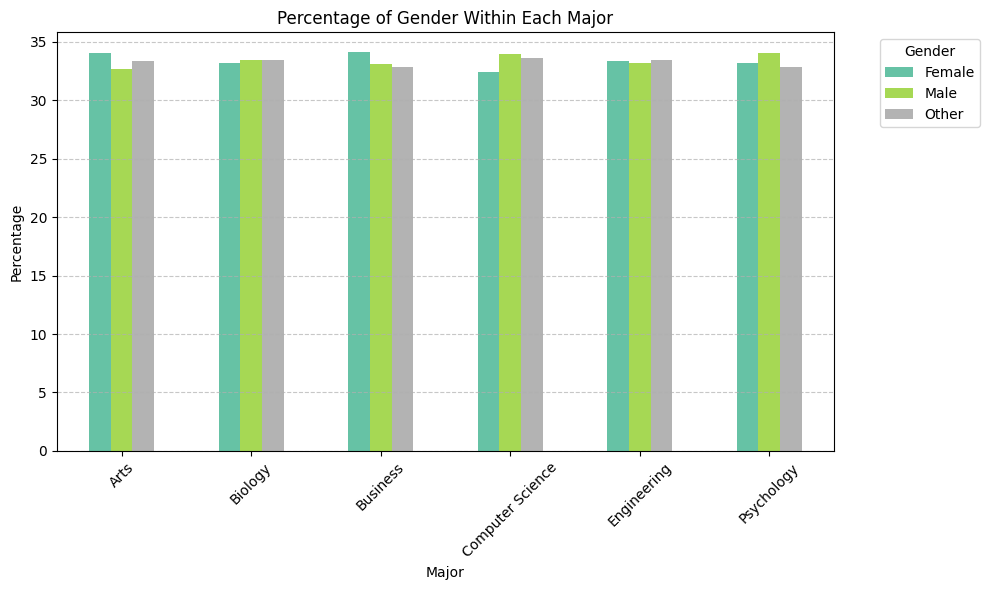

In [ ]:
# Plot the stacked bar chart
gender_major_pct.plot(kind='bar', figsize=(10, 6), colormap='Set2')

# Chart aesthetics
plt.title('Percentage of Gender Within Each Major')
plt.ylabel('Percentage')
plt.xlabel('Major')
plt.xticks(rotation=45)
plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

In [ ]:
# Group by major and gender, then calculate dropout risk rate
dropout_by_major_gender = data.groupby(['major', 'gender'])['dropout_risk'].mean().unstack() * 100

# Round for readability
dropout_by_major_gender = dropout_by_major_gender.round(2)

# Display the table
print("Dropout risk (%) by Major and Gender:")
print(dropout_by_major_gender)

Dropout risk (%) by Major and Gender:
gender            Female  Male  Other
major                                
Arts                1.72  2.25   2.23
Biology             1.90  2.62   1.68
Business            1.91  1.78   1.98
Computer Science    2.05  2.00   2.16
Engineering         1.54  1.71   1.84
Psychology          2.43  2.10   1.64


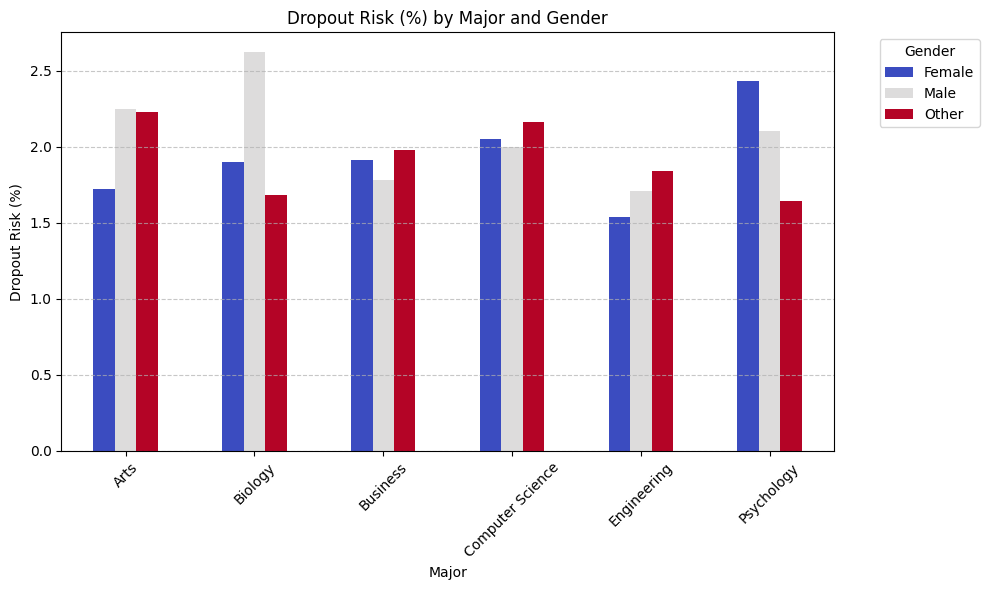

In [ ]:
# Plot grouped bar chart
dropout_by_major_gender.plot(kind='bar', figsize=(10, 6), colormap='coolwarm')

plt.title('Dropout Risk (%) by Major and Gender')
plt.ylabel('Dropout Risk (%)')
plt.xlabel('Major')
plt.xticks(rotation=45)
plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [ ]:
# Value counts for dropout_risk in the original data
dropout_counts = data['dropout_risk'].value_counts()

print("Dropout Risk Value Counts:")
print(dropout_counts)

Dropout Risk Value Counts:
dropout_risk
False    78137
True      1574
Name: count, dtype: int64


I filter the high risk data set because of below facts.

Psychology – Female: This group shows the highest dropout risk among all gender-major combinations, with a rate close to 2.5%.

Biology – Male: Male students in Biology also show a dropout rate above 2.5%, which is the highest among male students across all majors.

Computer Science (All Genders): All gender groups in Computer Science (Female, Male, Other) display consistently high dropout risk, all around or above 2.0%.

In [ ]:
# Filter high-risk groups
high_risk_data = data[
    ((data['major'] == 'Psychology') & (data['gender'] == 'Female')) |
    ((data['major'] == 'Biology') & (data['gender'] == 'Male')) |
    (data['major'] == 'Computer Science')
]

In [ ]:
high_risk_data.head()

,age,gender,major,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,...,screen_time,study_environment,access_to_tutoring,family_income_range,parental_support_level,motivation_level,exam_anxiety_score,learning_style,time_management_score,exam_score
0,26,Male,Computer Science,7.645367,3.0,0.1,True,70.3,6.2,Poor,...,10.9,Co-Learning Group,True,High,9,7,8,Reading,3.0,100
8,28,Female,Psychology,0.600000,0.3,2.6,True,64.2,7.6,Fair,...,4.8,Library,False,Low,4,4,10,Kinesthetic,5.8,70
15,17,Female,Computer Science,3.527595,0.1,0.8,True,98.0,8.0,Fair,...,5.1,Quiet Room,False,Medium,9,6,9,Reading,9.5,87
16,16,Male,Biology,5.000000,4.5,0.8,False,40.1,9.7,Good,...,10.4,Dorm,False,High,4,6,9,Reading,4.9,100
18,26,Male,Biology,2.600000,0.5,3.8,True,53.5,9.1,Fair,...,7.4,Quiet Room,False,Low,4,8,7,Kinesthetic,6.5,88


I create a new copy of the high_risk_data dataframe to avoid modifying the original dataset.

Categorical columns such as gender, major, or study_environment are transformed into numerical format using one-hot encoding.

Boolean values (True/False) in the dataset are converted to integers (1/0) so they can be included in mathematical operations like correlation.



In [ ]:
# Step 1: Make a copy of the high-risk data
df = high_risk_data.copy()

# Step 2: Encode categorical variables (One-Hot Encoding)
df_encoded = pd.get_dummies(df, drop_first=True)

# Step 3: Convert boolean columns to integers
df_encoded = df_encoded.astype(int)

# Step 4: Compute correlation matrix
corr_matrix = df_encoded.corr() # This computes the Pearson correlation coefficient between all pairs of variables in the dataset.

# Step 5: Get correlation with dropout_risk only
# Extract only the correlations between all features and the target variable dropout_risk
dropout_corr = corr_matrix['dropout_risk'].sort_values(key=abs, ascending=False)

# Step 6: Visualize top correlations
# The correlation of dropout_risk with itself is always 1, so drop that row.
top_corr = dropout_corr.drop('dropout_risk').head(10)

# Convert to DataFrame for better label handling
top_corr_df = top_corr.reset_index()
top_corr_df.columns = ['Feature', 'Correlation']

In [ ]:
df_encoded.head()

,age,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,extracurricular_participation,...,internet_quality_Medium,study_environment_Co-Learning Group,study_environment_Dorm,study_environment_Library,study_environment_Quiet Room,family_income_range_Low,family_income_range_Medium,learning_style_Kinesthetic,learning_style_Reading,learning_style_Visual
0,26,7,3,0,1,70,6,3,6,1,...,0,1,0,0,0,0,0,0,1,0
8,28,0,0,2,1,64,7,0,3,0,...,1,0,0,1,0,1,0,1,0,0
15,17,3,0,0,1,98,8,1,10,1,...,1,0,0,0,1,0,1,0,1,0
16,16,5,4,0,0,40,9,6,9,0,...,0,0,1,0,0,0,0,0,1,0
18,26,2,0,3,1,53,9,4,9,1,...,0,0,0,0,1,1,0,1,0,0


/tmp/ipython-input-31-3046076745.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_corr_df, y='Feature', x='Correlation', palette='coolwarm')


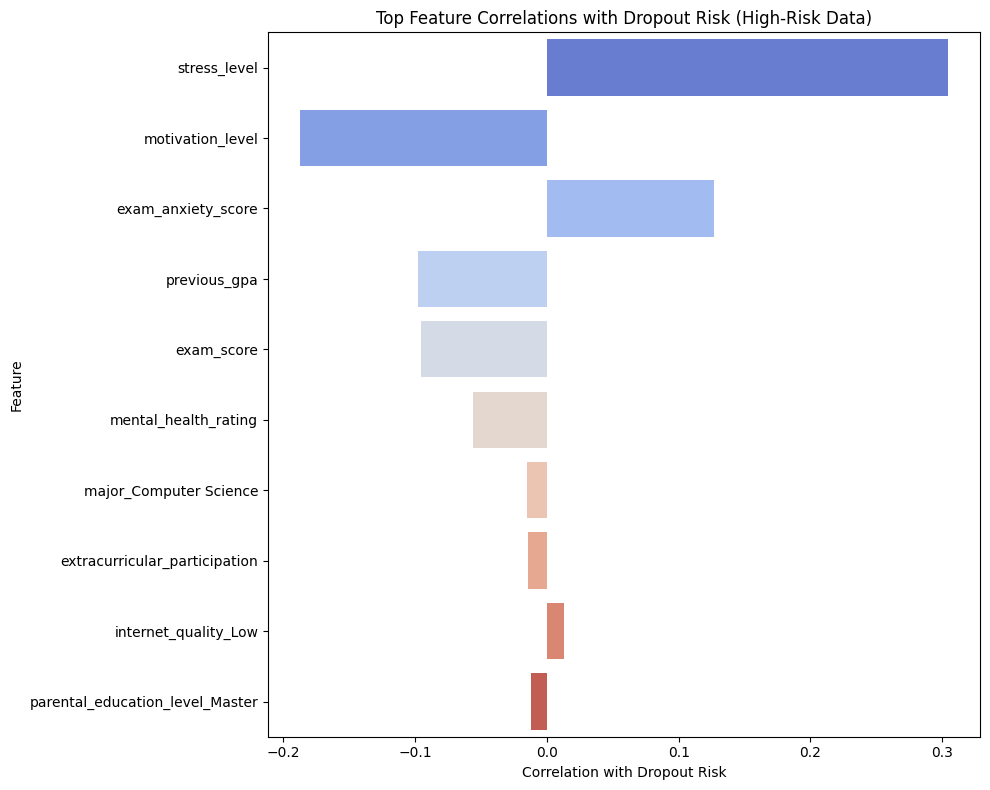

In [ ]:
plt.figure(figsize=(10, 8))
sns.barplot(data=top_corr_df, y='Feature', x='Correlation', palette='coolwarm')
plt.title('Top Feature Correlations with Dropout Risk (High-Risk Data)')
plt.xlabel('Correlation with Dropout Risk')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

**Key Insights on Dropout Risk (High-Risk Students)**

* Students with high stress levels and exam anxiety are more likely to drop out.

* Lower GPA and exam scores are linked to higher dropout risk.

* Better mental health reduce the risk of dropping out.

* Computer Science students are frequently present in high-risk groups.





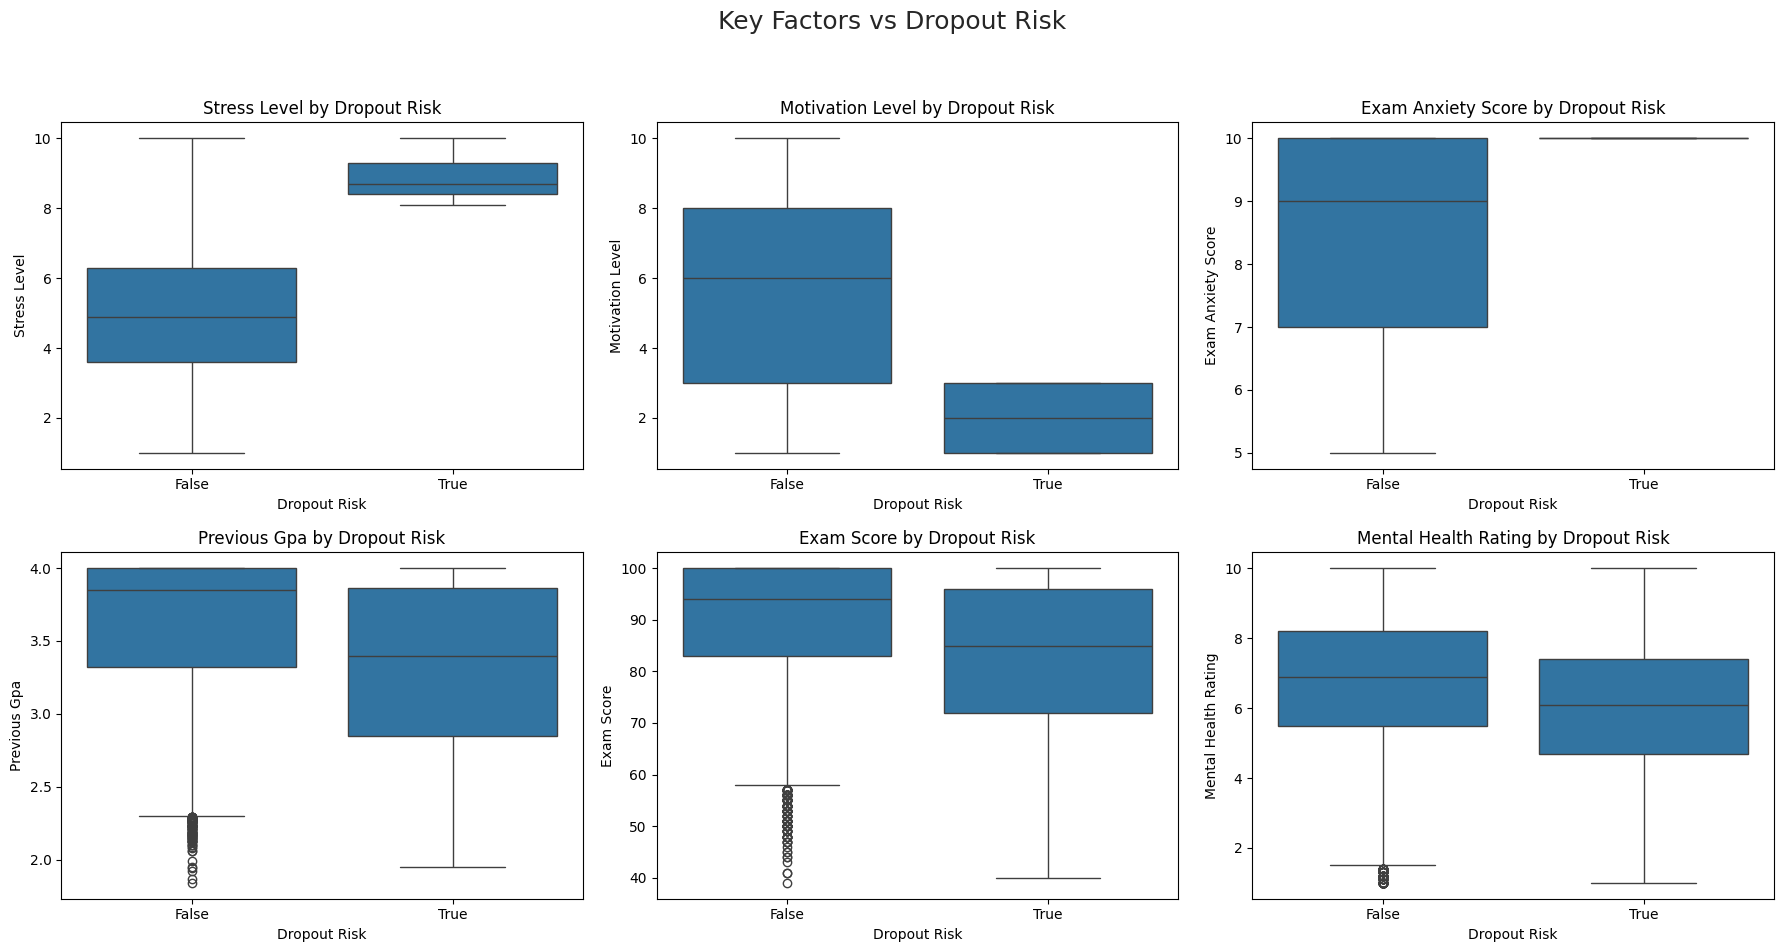

In [ ]:
# List of features to plot
features = [
    'stress_level',
    'motivation_level',
    'exam_anxiety_score',
    'previous_gpa',
    'exam_score',
    'mental_health_rating'
]

# Set up subplots: 2 rows x 3 columns
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
sns.set(style="whitegrid")
fig.suptitle("Key Factors vs Dropout Risk", fontsize=18)

# Flatten axes for easy looping
axes = axes.flatten()

# Loop through each feature and create a boxplot
for i, feature in enumerate(features):
    sns.boxplot(x='dropout_risk', y=feature, data=high_risk_data, ax=axes[i])
    axes[i].set_title(f'{feature.replace("_", " ").title()} by Dropout Risk')
    axes[i].set_xlabel('Dropout Risk')
    axes[i].set_ylabel(feature.replace("_", " ").title())

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

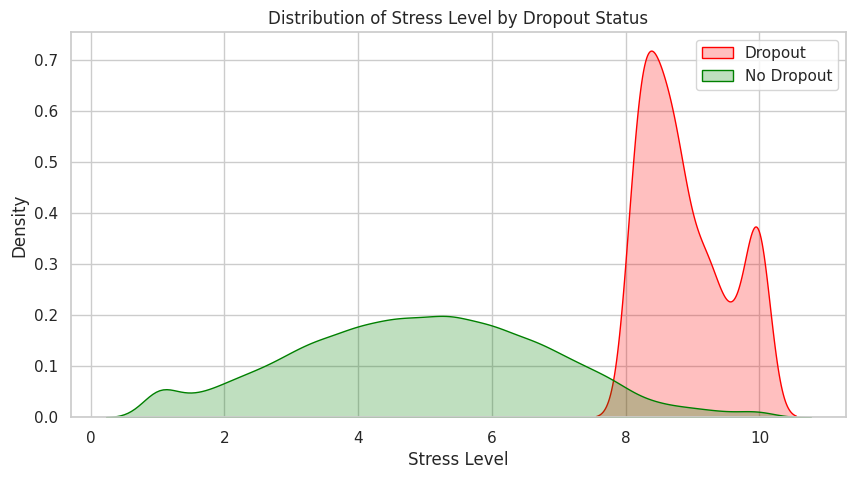

In [ ]:
plt.figure(figsize=(10, 5))
sns.kdeplot(data=high_risk_data[high_risk_data['dropout_risk'] == True]['stress_level'], label='Dropout', fill=True,color='red')
sns.kdeplot(data=high_risk_data[high_risk_data['dropout_risk'] == False]['stress_level'], label='No Dropout', fill=True,color='green')
plt.title('Distribution of Stress Level by Dropout Status')
plt.xlabel('Stress Level')
plt.legend()
plt.show()

I tired to check the different chart for Stress level and Dropout risk.



---



In [ ]:
# Step 1: Make a copy of data
df = data.copy()

# Step 2: Encode categorical variables (One-Hot Encoding)
df_encoded = pd.get_dummies(df, drop_first=True)

# Step 3: Convert boolean columns to integers
df_encoded = df_encoded.astype(int)

# Step 4: Compute correlation matrix
corr_matrix = df_encoded.corr()

# Step 5: Get correlation with exam_score only
exam_corr = corr_matrix['exam_score'].sort_values(key=abs, ascending=False)

# Step 6: Visualize top 10 correlations (excluding exam_score itself)
top_corr = exam_corr.drop('exam_score').head(10)

# Convert to DataFrame for better label handling
top_corr_df = top_corr.reset_index()
top_corr_df.columns = ['Feature', 'Correlation']

/tmp/ipython-input-35-2947569310.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_corr_df, y='Feature', x='Correlation', palette='coolwarm')


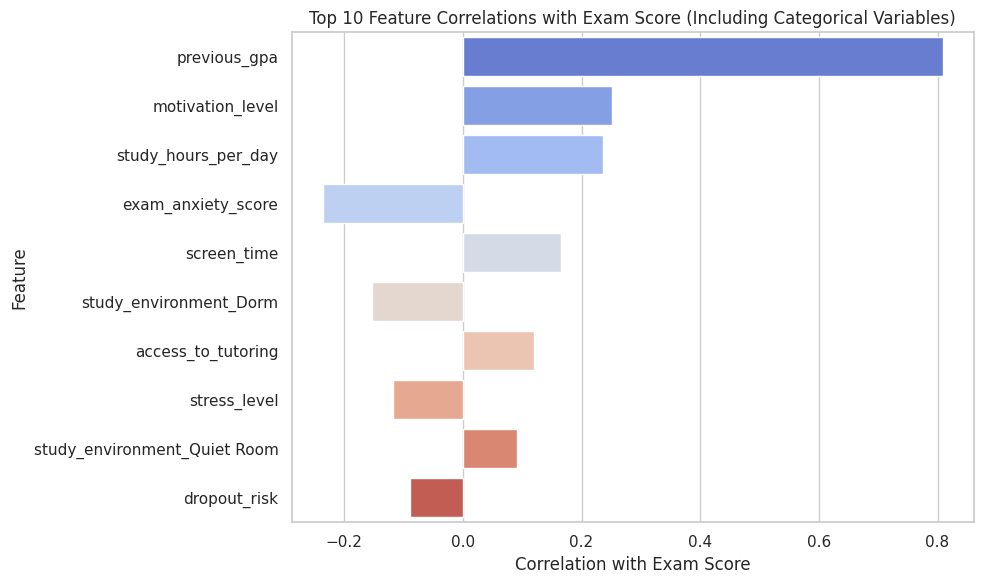

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=top_corr_df, y='Feature', x='Correlation', palette='coolwarm')
plt.title('Top 10 Feature Correlations with Exam Score (Including Categorical Variables)')
plt.xlabel('Correlation with Exam Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

/tmp/ipython-input-36-3917948421.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[5].set_xticklabels(['Not Dorm', 'Dorm'])
/tmp/ipython-input-36-3917948421.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[6].set_xticklabels(['No Access', 'Has Access'])
/tmp/ipython-input-36-3917948421.py:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[8].set_xticklabels(['Other', 'Quiet Room'])
/tmp/ipython-input-36-3917948421.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[9].set_xticklabels(['No', 'Yes'])


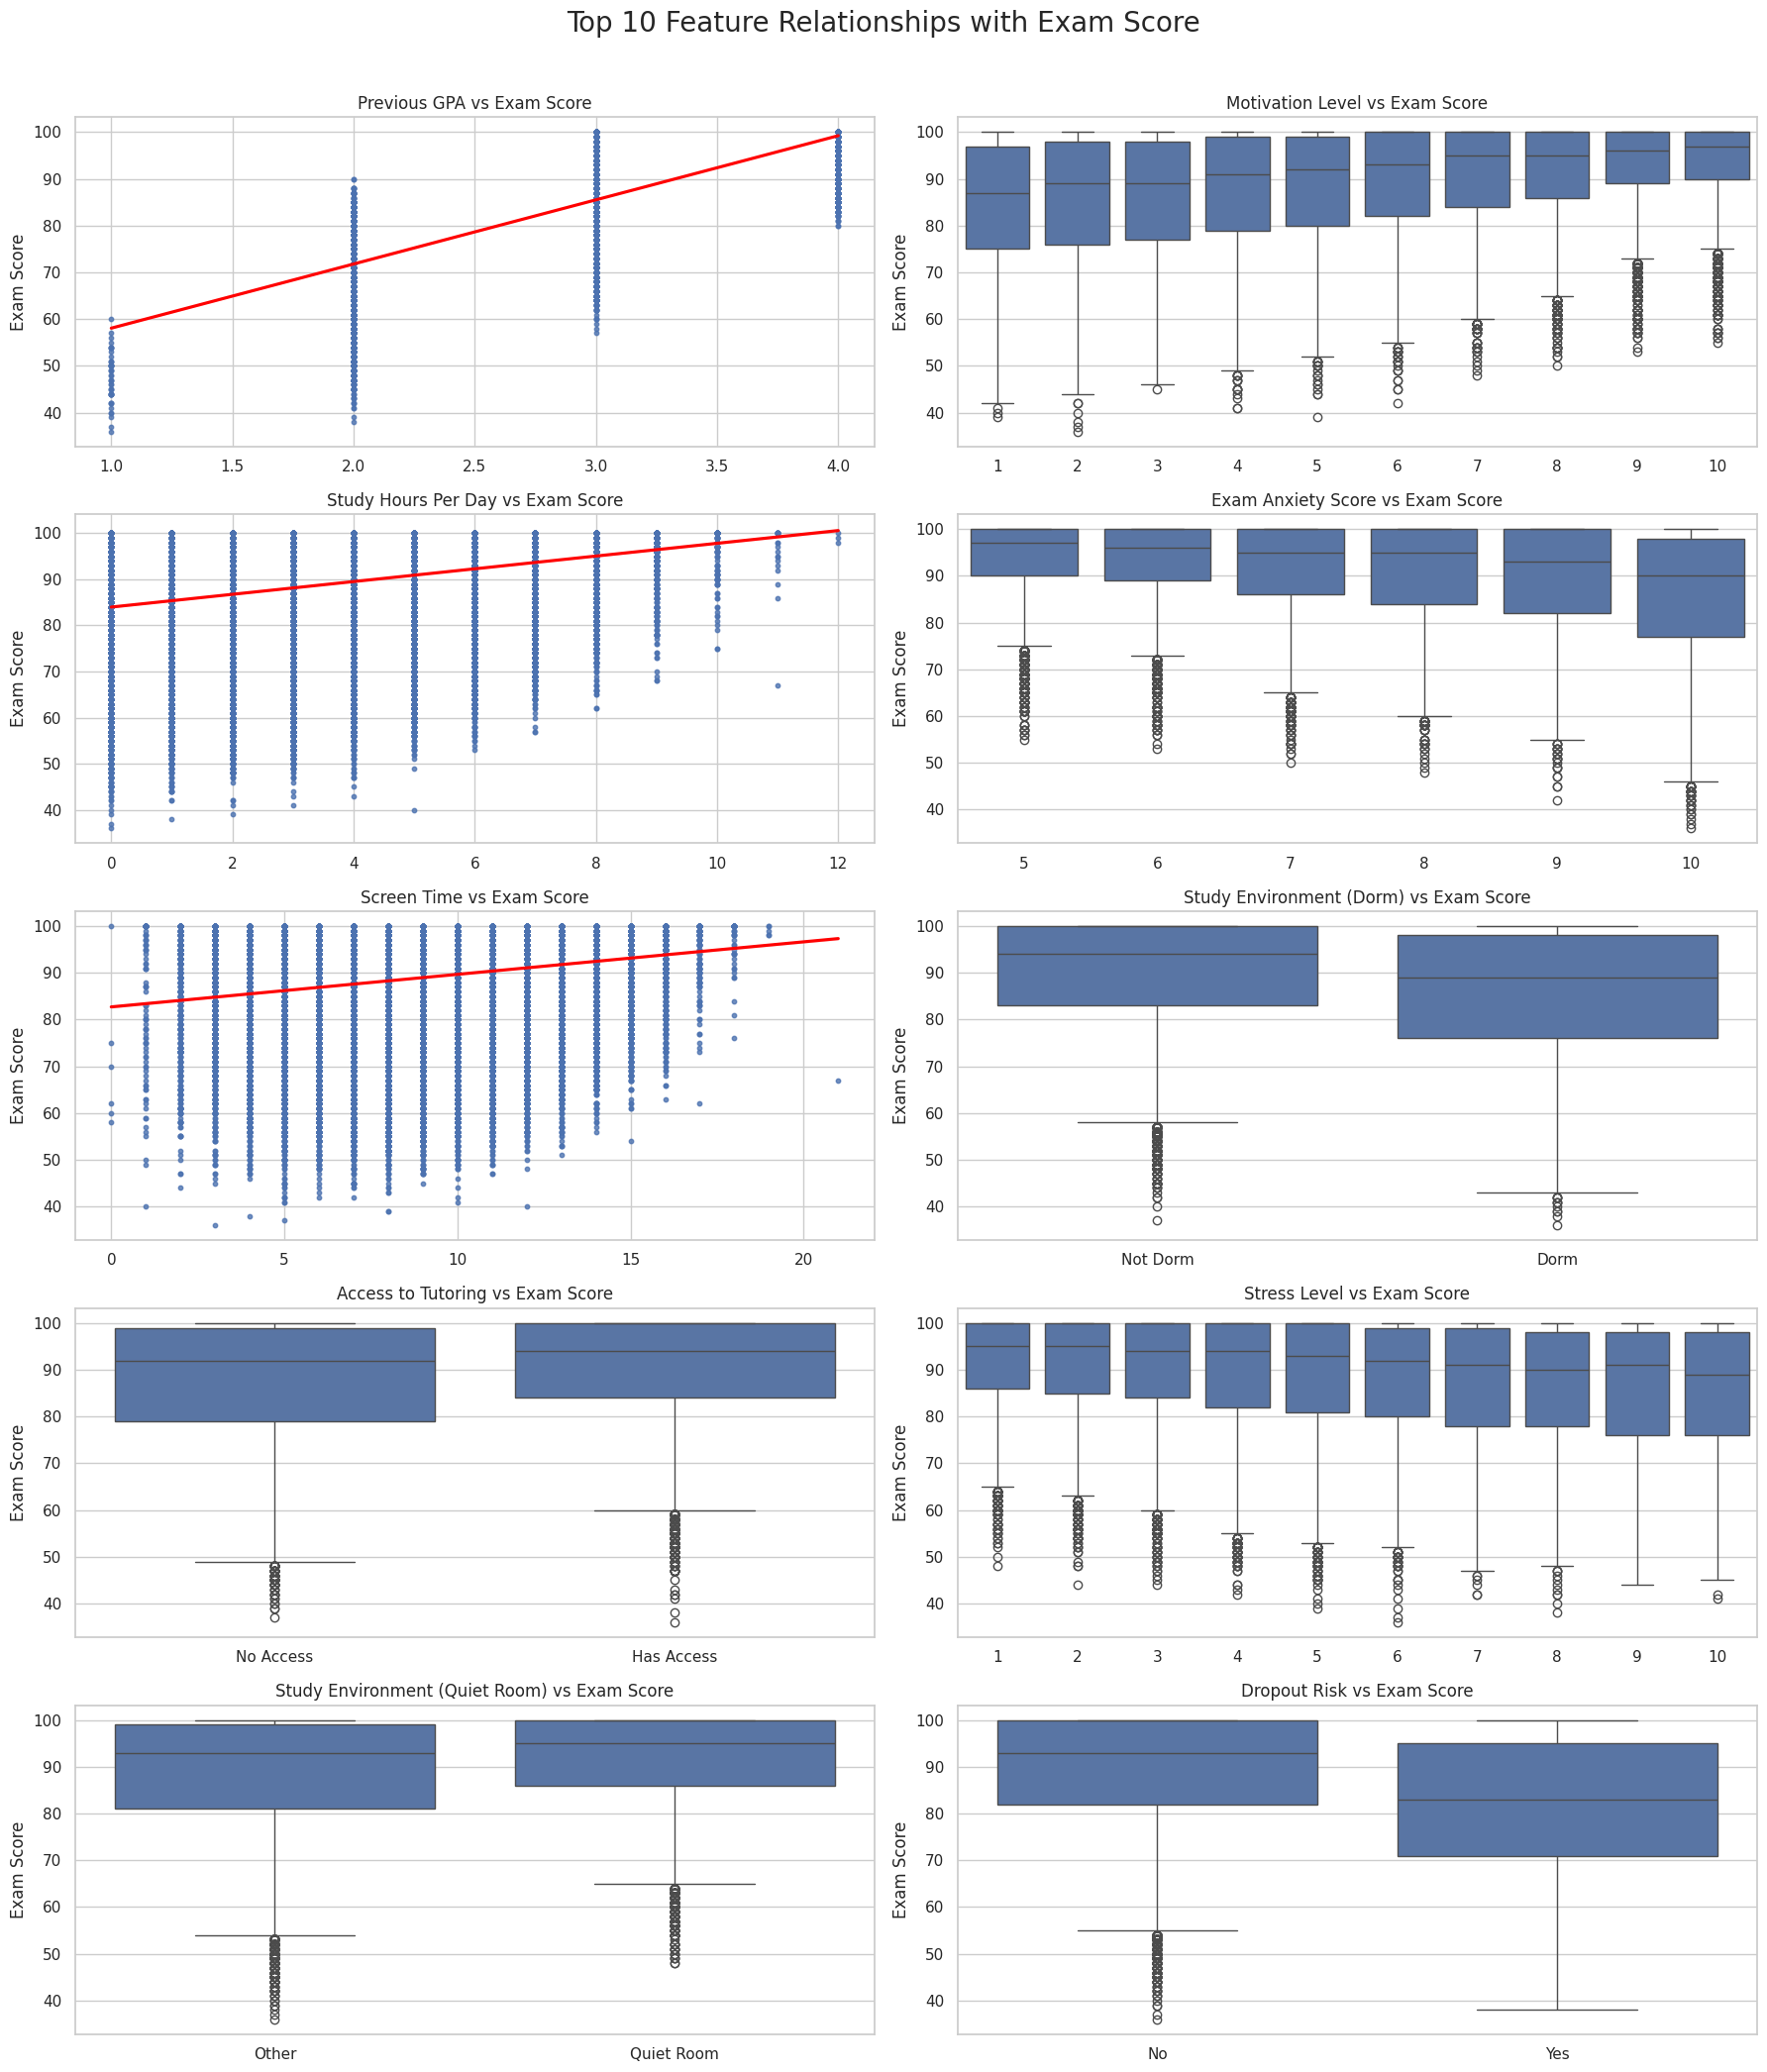

In [ ]:
# Set up 5 rows x 2 columns of subplots
fig, axes = plt.subplots(5, 2, figsize=(18, 22))
sns.set(style="whitegrid")
axes = axes.flatten()

# --- 1. Previous GPA ---
sns.regplot(x='previous_gpa', y='exam_score', data=df_encoded, scatter_kws={'s': 10}, line_kws={'color': 'red'}, ax=axes[0])
axes[0].set_title('Previous GPA vs Exam Score')

# --- 2. Motivation Level ---
sns.boxplot(x='motivation_level', y='exam_score', data=df_encoded, ax=axes[1])
axes[1].set_title('Motivation Level vs Exam Score')

# --- 3. Study Hours Per Day ---
sns.regplot(x='study_hours_per_day', y='exam_score', data=df_encoded, scatter_kws={'s': 10}, line_kws={'color': 'red'}, ax=axes[2])
axes[2].set_title('Study Hours Per Day vs Exam Score')

# --- 4. Exam Anxiety Score ---
sns.boxplot(x='exam_anxiety_score', y='exam_score', data=df_encoded, ax=axes[3])
axes[3].set_title('Exam Anxiety Score vs Exam Score')

# --- 5. Screen Time ---
sns.regplot(x='screen_time', y='exam_score', data=df_encoded, scatter_kws={'s': 10}, line_kws={'color': 'red'}, ax=axes[4])
axes[4].set_title('Screen Time vs Exam Score')

# --- 6. Study Environment: Dorm ---
sns.boxplot(x='study_environment_Dorm', y='exam_score', data=df_encoded, ax=axes[5])
axes[5].set_xticklabels(['Not Dorm', 'Dorm'])
axes[5].set_title('Study Environment (Dorm) vs Exam Score')

# --- 7. Access to Tutoring ---
sns.boxplot(x='access_to_tutoring', y='exam_score', data=df_encoded, ax=axes[6])
axes[6].set_xticklabels(['No Access', 'Has Access'])
axes[6].set_title('Access to Tutoring vs Exam Score')

# --- 8. Stress Level ---
sns.boxplot(x='stress_level', y='exam_score', data=df_encoded, ax=axes[7])
axes[7].set_title('Stress Level vs Exam Score')

# --- 9. Study Environment: Quiet Room ---
sns.boxplot(x='study_environment_Quiet Room', y='exam_score', data=df_encoded, ax=axes[8])
axes[8].set_xticklabels(['Other', 'Quiet Room'])
axes[8].set_title('Study Environment (Quiet Room) vs Exam Score')

# --- 10. Dropout Risk ---
sns.boxplot(x='dropout_risk', y='exam_score', data=df_encoded, ax=axes[9])
axes[9].set_xticklabels(['No', 'Yes'])
axes[9].set_title('Dropout Risk vs Exam Score')

# Shared formatting
for ax in axes:
    ax.set_xlabel('')
    ax.set_ylabel('Exam Score')

plt.suptitle('Top 10 Feature Relationships with Exam Score', fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()

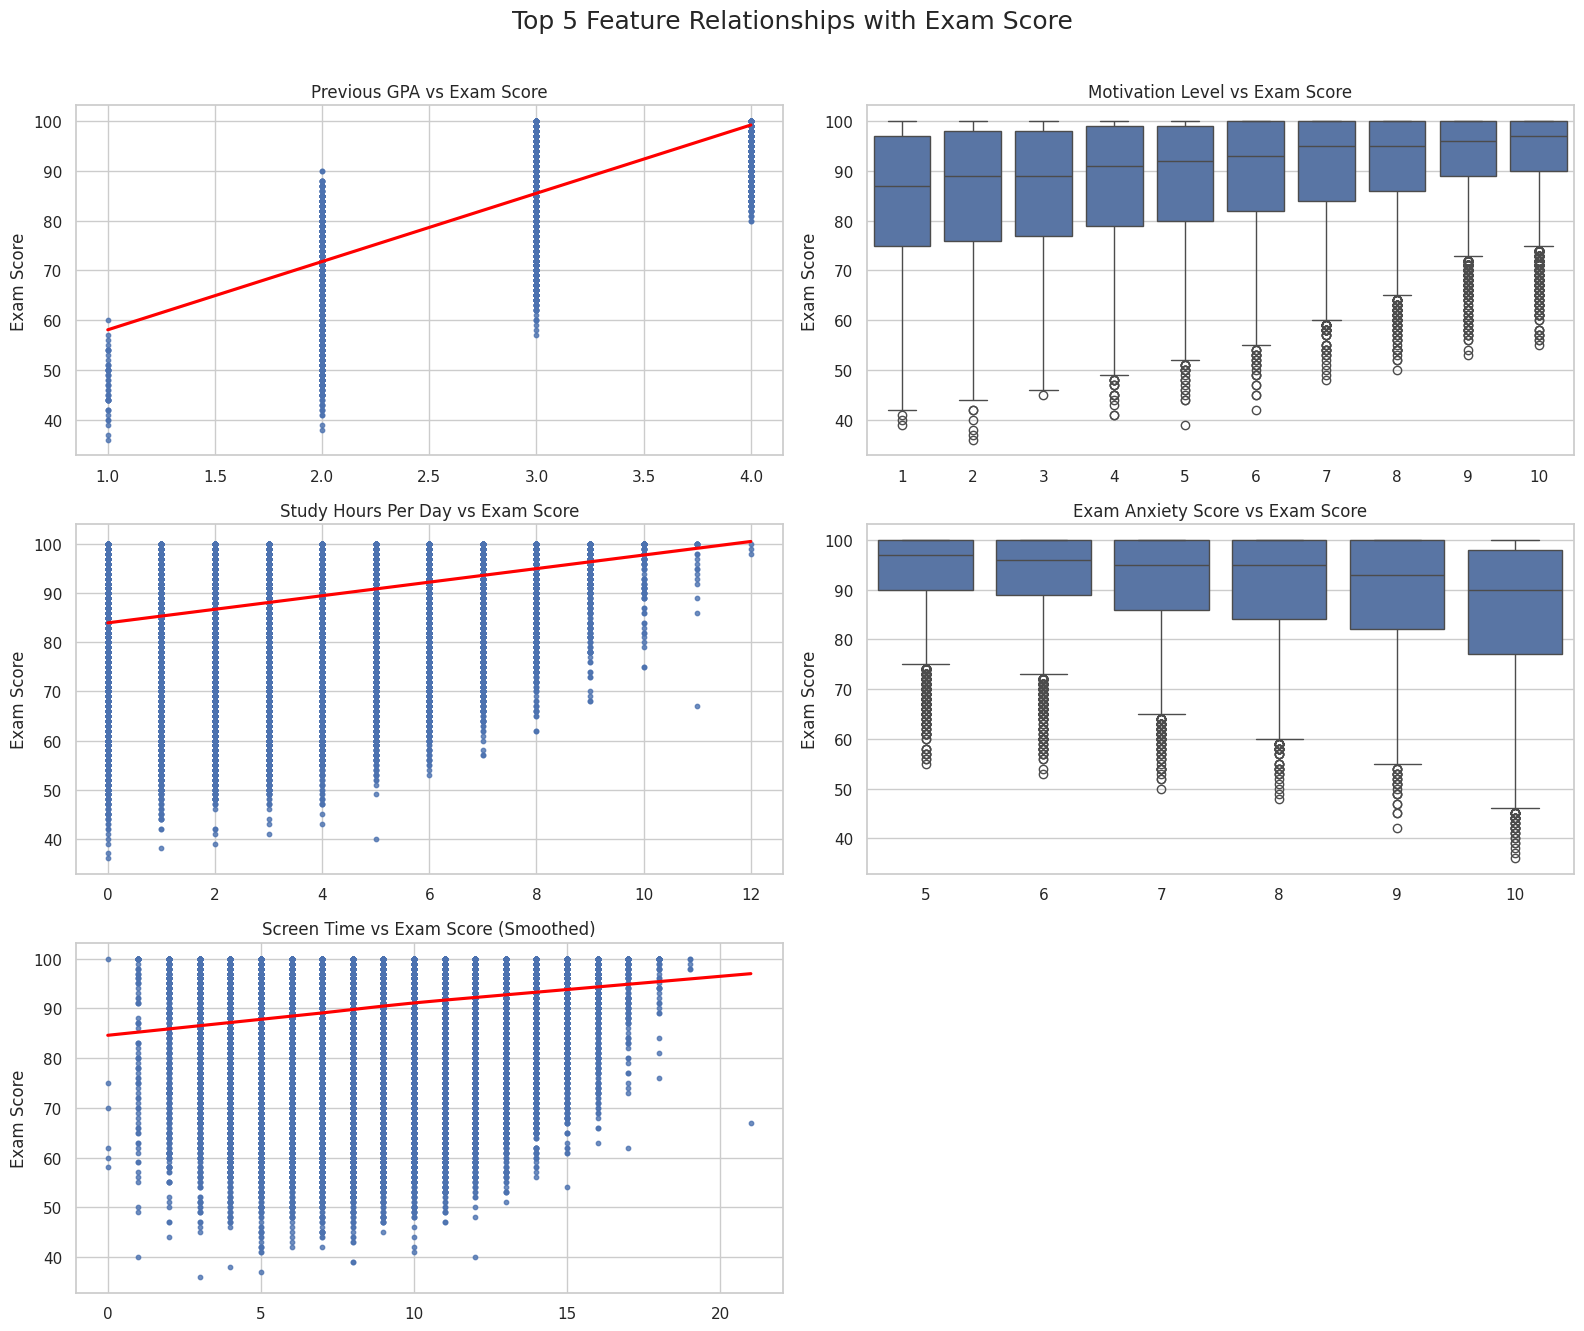

In [ ]:
# Set up 3 rows x 2 columns of subplots
fig, axes = plt.subplots(3, 2, figsize=(16, 14))
sns.set(style="whitegrid")
axes = axes.flatten()

# --- 1. Previous GPA ---
sns.regplot(x='previous_gpa', y='exam_score', data=df_encoded,
            scatter_kws={'s': 10}, line_kws={'color': 'red'}, ax=axes[0])
axes[0].set_title('Previous GPA vs Exam Score')

# --- 2. Motivation Level ---
sns.boxplot(x='motivation_level', y='exam_score', data=df_encoded, ax=axes[1])
axes[1].set_title('Motivation Level vs Exam Score')

# --- 3. Study Hours Per Day ---
sns.regplot(x='study_hours_per_day', y='exam_score', data=df_encoded,
            scatter_kws={'s': 10}, line_kws={'color': 'red'}, ax=axes[2])
axes[2].set_title('Study Hours Per Day vs Exam Score')

# --- 4. Exam Anxiety Score ---
sns.boxplot(x='exam_anxiety_score', y='exam_score', data=df_encoded, ax=axes[3])
axes[3].set_title('Exam Anxiety Score vs Exam Score')

# --- 5. Screen Time ---
sns.regplot(x='screen_time', y='exam_score', data=df_encoded,
            scatter_kws={'s': 10}, lowess=True, line_kws={'color': 'red'}, ax=axes[4])
axes[4].set_title('Screen Time vs Exam Score (Smoothed)')

# Hide the last unused subplot
axes[5].axis('off')

# Shared formatting
for ax in axes[:5]:
    ax.set_xlabel('')
    ax.set_ylabel('Exam Score')

plt.suptitle('Top 5 Feature Relationships with Exam Score', fontsize=18)
plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()


/tmp/ipython-input-38-4033745799.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(['Not Dorm', 'Dorm'])
/tmp/ipython-input-38-4033745799.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(['No Access', 'Has Access'])
/tmp/ipython-input-38-4033745799.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[3].set_xticklabels(['Other', 'Quiet Room'])
/tmp/ipython-input-38-4033745799.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[4].set_xticklabels(['No', 'Yes'])


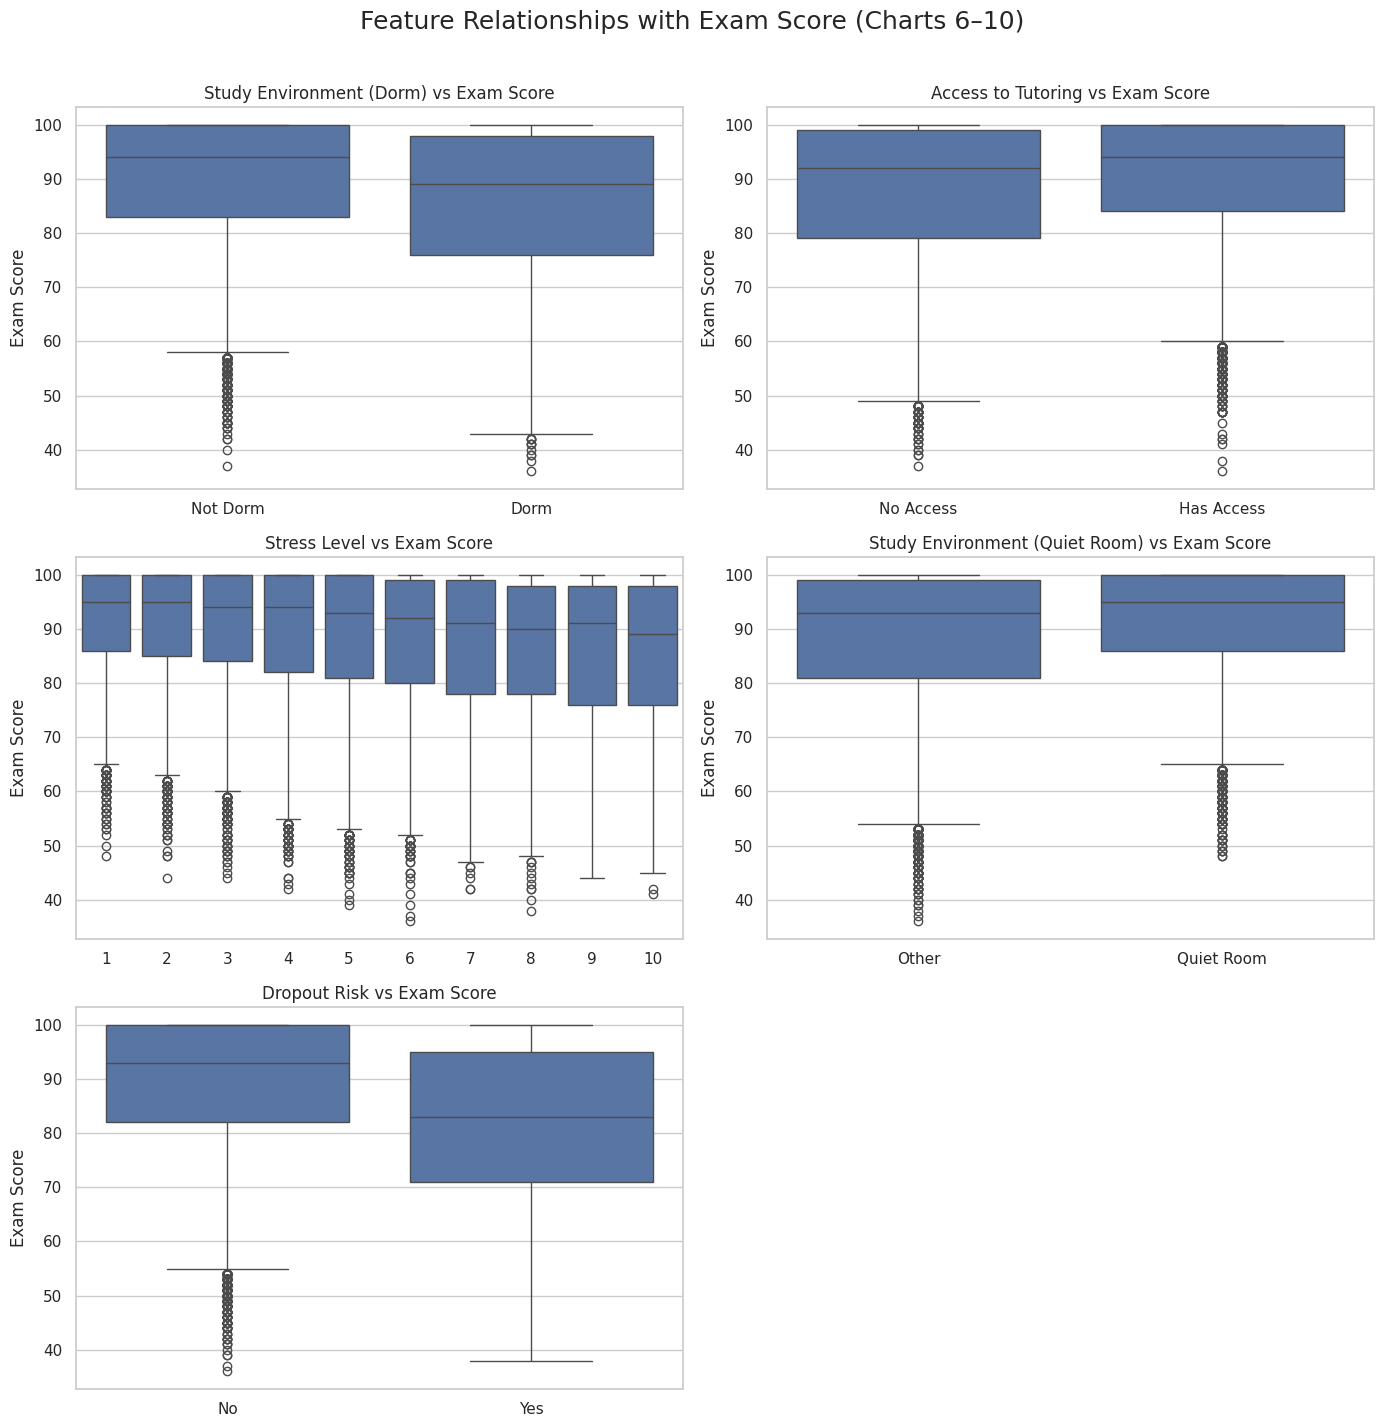

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(14, 15))
sns.set(style="whitegrid")
axes = axes.flatten()

# --- 6. Study Environment: Dorm ---
sns.boxplot(x='study_environment_Dorm', y='exam_score', data=df_encoded, ax=axes[0])
axes[0].set_xticklabels(['Not Dorm', 'Dorm'])
axes[0].set_title('Study Environment (Dorm) vs Exam Score')

# --- 7. Access to Tutoring ---
sns.boxplot(x='access_to_tutoring', y='exam_score', data=df_encoded, ax=axes[1])
axes[1].set_xticklabels(['No Access', 'Has Access'])
axes[1].set_title('Access to Tutoring vs Exam Score')

# --- 8. Stress Level ---
sns.boxplot(x='stress_level', y='exam_score', data=df_encoded, ax=axes[2])
axes[2].set_title('Stress Level vs Exam Score')

# --- 9. Study Environment: Quiet Room ---
sns.boxplot(x='study_environment_Quiet Room', y='exam_score', data=df_encoded, ax=axes[3])
axes[3].set_xticklabels(['Other', 'Quiet Room'])
axes[3].set_title('Study Environment (Quiet Room) vs Exam Score')

# --- 10. Dropout Risk ---
sns.boxplot(x='dropout_risk', y='exam_score', data=df_encoded, ax=axes[4])
axes[4].set_xticklabels(['No', 'Yes'])
axes[4].set_title('Dropout Risk vs Exam Score')

# Hide the sixth subplot (bottom right) since only 5 plots are used
axes[5].axis('off')

# Shared formatting
for ax in axes[:5]:
    ax.set_xlabel('')
    ax.set_ylabel('Exam Score')

plt.suptitle('Feature Relationships with Exam Score (Charts 6–10)', fontsize=18)
plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()



---



# Additional Step (Exploring the different way of visualizations and another findings)

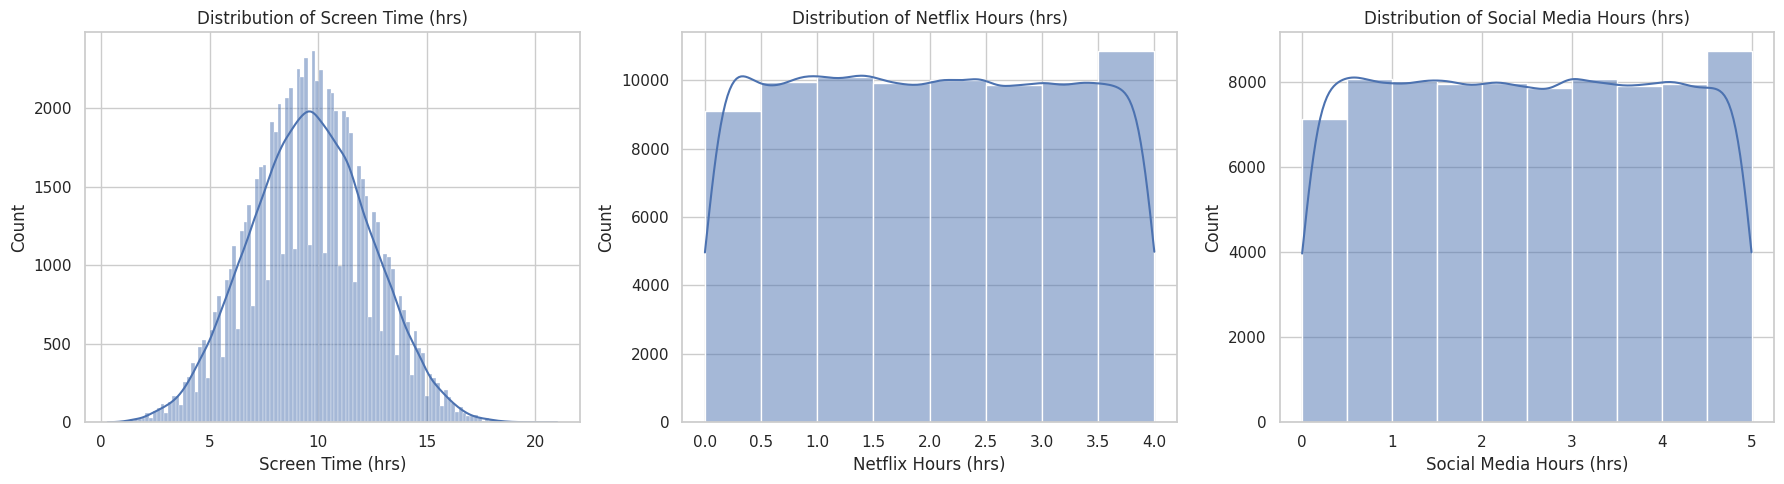

In [ ]:
plt.figure(figsize=(18, 5))

# Distribution of Screen Time (keep original)
plt.subplot(1, 3, 1)
sns.histplot(data['screen_time'], kde=True)
plt.title('Distribution of Screen Time (hrs)')
plt.xlabel('Screen Time (hrs)')

# Distribution of Netflix Hours (1-hour bins)
plt.subplot(1, 3, 2)
sns.histplot(data['netflix_hours'], kde=True, binwidth=0.5)
plt.title('Distribution of Netflix Hours (hrs)')
plt.xlabel('Netflix Hours (hrs)')

# Distribution of Social Media Hours (1-hour bins)
plt.subplot(1, 3, 3)
sns.histplot(data['social_media_hours'], kde=True, binwidth=0.5)
plt.title('Distribution of Social Media Hours (hrs)')
plt.xlabel('Social Media Hours (hrs)')

plt.tight_layout()
plt.show()


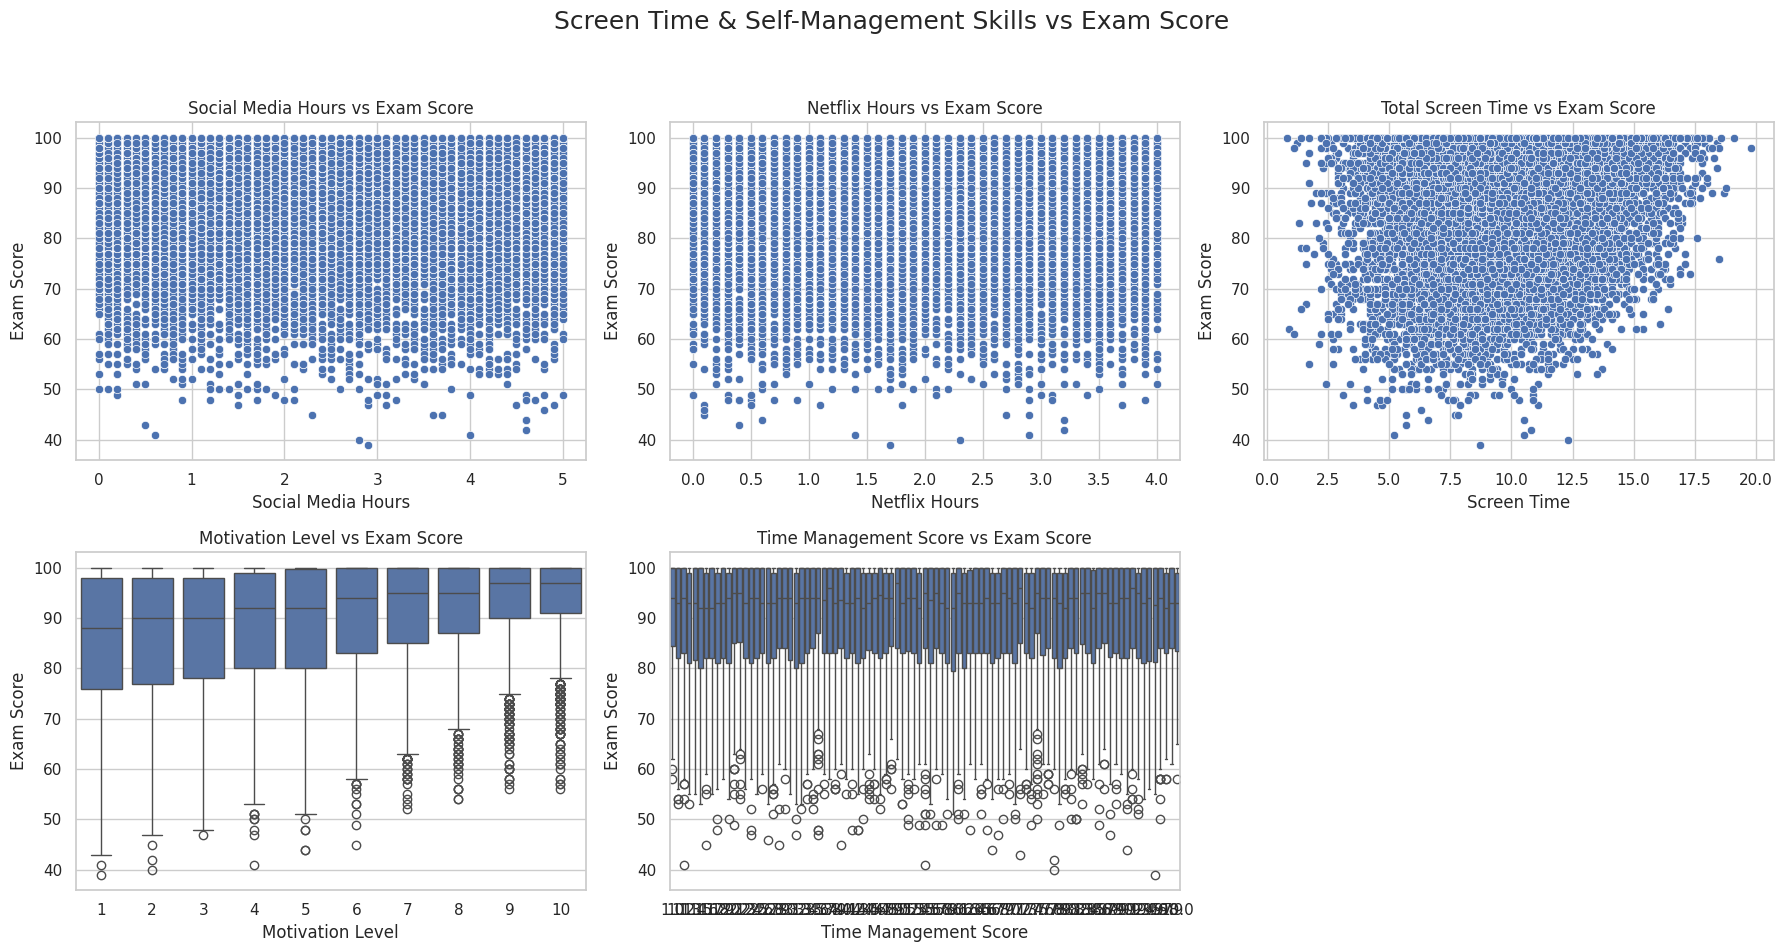

In [ ]:
sns.set(style="whitegrid")

# Set up subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle("Screen Time & Self-Management Skills vs Exam Score", fontsize=18)

# --- Screen Time Analysis ---

# 1. Social Media Hours vs Exam Score
sns.scatterplot(x='social_media_hours', y='exam_score', data=high_risk_data, ax=axes[0, 0])
axes[0, 0].set_title('Social Media Hours vs Exam Score')
axes[0, 0].set_xlabel('Social Media Hours')
axes[0, 0].set_ylabel('Exam Score')

# 2. Netflix Hours vs Exam Score
sns.scatterplot(x='netflix_hours', y='exam_score', data=high_risk_data, ax=axes[0, 1])
axes[0, 1].set_title('Netflix Hours vs Exam Score')
axes[0, 1].set_xlabel('Netflix Hours')
axes[0, 1].set_ylabel('Exam Score')

# 3. Screen Time vs Exam Score
sns.scatterplot(x='screen_time', y='exam_score', data=high_risk_data, ax=axes[0, 2])
axes[0, 2].set_title('Total Screen Time vs Exam Score')
axes[0, 2].set_xlabel('Screen Time')
axes[0, 2].set_ylabel('Exam Score')

# --- Self-Management Skills Analysis ---

# 4. Motivation Level vs Exam Score
sns.boxplot(x='motivation_level', y='exam_score', data=high_risk_data, ax=axes[1, 0])
axes[1, 0].set_title('Motivation Level vs Exam Score')
axes[1, 0].set_xlabel('Motivation Level')
axes[1, 0].set_ylabel('Exam Score')

# 5. Time Management Score vs Exam Score
sns.boxplot(x='time_management_score', y='exam_score', data=high_risk_data, ax=axes[1, 1])
axes[1, 1].set_title('Time Management Score vs Exam Score')
axes[1, 1].set_xlabel('Time Management Score')
axes[1, 1].set_ylabel('Exam Score')

# Hide last subplot if unused
axes[1, 2].axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

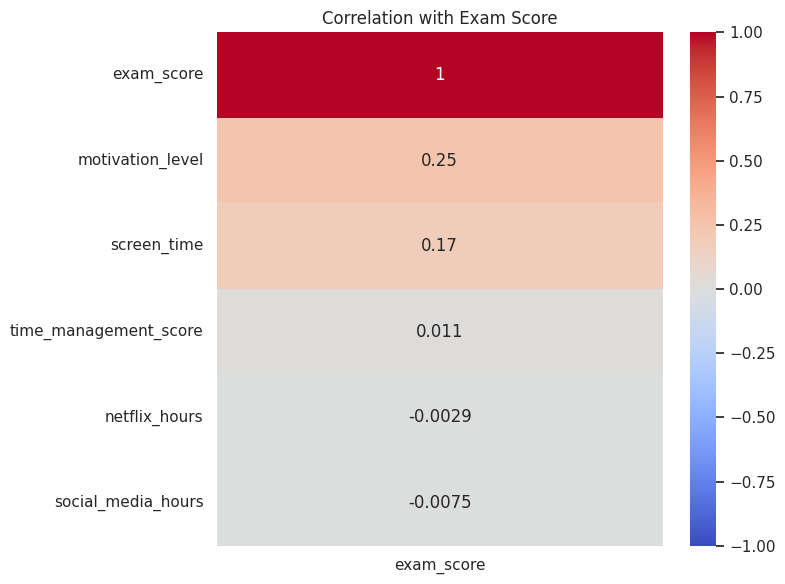

In [ ]:
# Select relevant columns
cols = [
    'social_media_hours', 'netflix_hours', 'screen_time',
    'motivation_level', 'time_management_score', 'exam_score'
]
corr = high_risk_data[cols].corr()

# Plot
plt.figure(figsize=(8, 6))
sns.heatmap(corr[['exam_score']].sort_values(by='exam_score', ascending=False),
            annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation with Exam Score')
plt.tight_layout()
plt.show()